# EDA Project - King County Housing
EDA project with King County Housing (KCH) data. Client is Erin Robinson. She is looking to *invest in poor neighborhood* and *buying & selling* and wants *costs back plus a little profit*. She wants to make *socially responsible* decisions. 

## 1. Setting up working environment
Importing needed libraries, define overall graph deployment,...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# calculate distance between two points with given geodata
from geopy.distance import geodesic

#for heatmap on streetmap
import folium
from folium import plugins

# transform zipcodes to city
import uszipcode

#import eda_functions as edaf

/Users/pcfisch/Neuefische/MyWork/eda-project-nf/.venv/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# import data and save as dataframe
kch_df = pd.read_csv('data/King_County_House_prices_dataset.csv')

## 2. Understand the data
* Variable names and short explanation in `column_names.md`

In [3]:
kch_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Get information on dataframe
kch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Missing data
* waterfront (some)
* view (a few)
* yr_renovated (many)

#### Data Types
**Categorical Data**

*Nominal*
* id
* waterfront

*Ordinal*
* date
* view
* condition
* grade
* yr_built
* yr_renovated

**Numerical Data**

*Continuous (interval/ratio)*
* price
* sqft_living
* sqft_lot
* sqft_above
* sqft_basement
* sqft_living15
* sqft_lot15


*Discrete (interval/ratio)*
* bedrooms
* bathrooms
* floors
* lat
* long


In [5]:
# get an idea of the basic statistics
kch_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# get a further sense of data values
kch_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
# df too long - check in for variable `condition`
kch_df.condition.head()

0    3
1    3
2    3
3    5
4    3
Name: condition, dtype: int64

## 3. Hypothesis

Working hypothesis on *"poor neighborhood"*: a neighborhood is poor, when the mean price of properties lies in the first quartile.

### (#) Questions, (a) Hypotheses, (b) Indicators

***My focus***

1. Does the current condition of the property impact the property price?
* (a) The higher the current condition (i.e. better), the higher the price
* (b) condition

2. Does the distance to the city center of Seattle impact the property prices?
* (a) The farther away from the city center, the lower the price
* (b) geo location (long, lat)

3. Does the year of the last renovation impact the property prices?
* (a) The longer ago the last renovation the lower the price
* (b) yr_renovated

##### Additional information on ["Condition"](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b)

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. 

#### ***Additional possible questions***

4. Does the living area of the nearest neighbors impact the property price?
* (a) The more square feet the living area of the nearest neighbor has, the higher the price
* (b) sqft_living15


5. Does the living area impact the property price?
* (a) The more square feet the living area has, the higher the price
* (b) sqft_living

6. Does lot area impact the property price?
* (a) The more square feet the lot area has, the higher the price
* (b) sqft_lot

7. Does waterfront placement impact on the property price?
* (a) Properties at the waterfront have a higher price than properties not at the waterfront
* (b) waterfront (yes/no)

8. Does the distance to the city center of Seattle impact the property prices?
* (a) The farther away from the city center, the lower the price
* (b) geo location (long, lat)

9. Does the KCH grade impact the property price?
* (a) The higher the grade (i.e. better), the higher the price
* (b) grade

10. Does the quality of view have an impact on property prices?
* (a) The higher the quality of view, the higher the price
* (b) quality of view (min - max)

11. Does lot area of the nearest neighbors impact the property price?
* (a) The more square feet the lot area of the nearest neighbor has, the higher the price
* (b) sqft_lot15

## 4. Exploration and Cleaning of data

### 1. Data Cleaning

**Check and change dtype if neccessary:**
* date
* bathrooms
* waterfront
* sqft_basement
* yr_renovated

#### 1.1 Date

In [8]:
# transform date type to_datetime
kch_df['date'] = pd.to_datetime(kch_df['date'], format="%m/%d/%Y")
kch_df['date'] = pd.to_datetime(kch_df['date'].dt.date)
type(kch_df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
# make month and year columns for later best selling time analysis
kch_df['month'] = kch_df['date'].dt.month
kch_df['year'] = kch_df['date'].dt.year

#### 1.2 Waterfront, view, condition

In [10]:
# transform waterfront data type to bools (no floats)
# kch_df.waterfront = kch_df.waterfront.astype('bool')
# kch_df.waterfront.unique()

In [11]:
# transform view data type to bools (no floats)
# kch_df.view = kch_df.view.astype('bool')
# kch_df.view.unique()

In [12]:
# Transform dtype of condition to int
kch_df['condition'] = kch_df['condition'].astype('int32')
type(kch_df['condition'][0])

numpy.int32

#### 1.3 Year renovated

In [13]:
# transform data type of yr_renovated from float to int
# first check, why dtype was made float
kch_df.yr_renovated.unique()    # have to handle missing values first


array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [14]:
kch_df['yr_renovated'] = np.nan_to_num(kch_df['yr_renovated'])
kch_df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [15]:
kch_df['yr_renovated'] = kch_df['yr_renovated'].astype('int')

#### 1.4 Distance to city center

Add variable for distance of each property to Seattle Center with coordinates -122.3320700 (lon), 47.6062100 (lat) which I took from the [dateandtime](https://dateandtime.info/citycoordinates.php?id=5809844) webpage on 27th Nov, 2023 at 10:27 am.

In [16]:
seattle = (47.60621, -122.33207)

dist_to_seattle = pd.Series([geodesic(seattle, (kch_df.lat[i], kch_df.long[i]))
                                     for i in np.arange(len(kch_df.lat))])

kch_df['dist_to_seattle'] = dist_to_seattle # in km

In [17]:
kch_df.dist_to_seattle.min(), kch_df.dist_to_seattle.max() 

(Distance(0.9838132172208137), Distance(77.31369533415251))

In [18]:
type(kch_df.dist_to_seattle[0])

geopy.distance.geodesic

Need to change dtype in order to use distance as measure for graphs:

In [19]:
kch_df['dist_to_seattle'] = kch_df['dist_to_seattle'].astype('str')
type(kch_df.dist_to_seattle[0])

str

In [20]:
kch_df['dist_to_seattle'] = kch_df['dist_to_seattle'].str.strip('km').astype('float')
type(kch_df.dist_to_seattle[0])

numpy.float64

#### 1.5 Calculate price_ sqft (living)

In [21]:
kch_df['price_sqft_living'] = kch_df.price / kch_df.sqft_living
kch_df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,dist_to_seattle,price_sqft_living
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,98178,47.5112,-122.257,1340,5650,10,2014,11.979331,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991,98125,47.7210,-122.319,1690,7639,12,2014,12.800484,209.338521


#### 1.6 Dealing with Duplicates

In [22]:
# check for duplicates over all columns
kch_df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

No complete duplicates. Are there any properties more than once?

In [23]:
# Check for duplicates for individual properties
kch_df['id'].duplicated(keep='last').value_counts()

id
False    21420
True       177
Name: count, dtype: int64

Yes, there are! Deal with the duplicates.

In [24]:
# check duplicates - difference in price and date?
duplicate_properties = kch_df.query('id.duplicated(keep="last")==True') # keep the first entry of duplicate, i.e. "old" price etc.
duplicate_properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 93 to 21564
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 177 non-null    int64         
 1   date               177 non-null    datetime64[ns]
 2   price              177 non-null    float64       
 3   bedrooms           177 non-null    int64         
 4   bathrooms          177 non-null    float64       
 5   sqft_living        177 non-null    int64         
 6   sqft_lot           177 non-null    int64         
 7   floors             177 non-null    float64       
 8   waterfront         154 non-null    float64       
 9   view               177 non-null    float64       
 10  condition          177 non-null    int32         
 11  grade              177 non-null    int64         
 12  sqft_above         177 non-null    int64         
 13  sqft_basement      177 non-null    object        
 14  yr_built    

In [25]:
#first_5_dups = (duplicate_properties.index-1)[:6]
#first_5_dups[:]
#duplicate_properties.index

In [26]:
#duplicate_properties[['id','date','price']].head(5), kch_df.loc[[93, 313, 324, 345, 371, 717],['id','date','price']]

In [27]:
# make new variable stating whether property was sold more than once (True/False)
kch_df['multi_sold'] = pd.Series(np.zeros(len(kch_df)).astype('bool'))
kch_df.loc[duplicate_properties.index+1,['multi_sold']] = True
kch_df.query('multi_sold==True').id.nunique() 

176

In [28]:
# drop duplicates, i.e. old price
kch_df.drop(index=duplicate_properties.index, axis=0, inplace=True)

In [29]:
duplicate_properties.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,dist_to_seattle,price_sqft_living
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,0,98117,47.6870,-122.386,1570,4500,7,2014,9.854127,272.151899
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,0,98006,47.5503,-122.102,3860,11244,6,2014,18.390911,321.678322
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,1984,98146,47.4957,-122.352,1820,7460,9,2014,12.377918,187.096774
345,3969300030,2014-07-23,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,0,98178,47.4897,-122.240,1020,7138,7,2014,14.691239,165.000000
371,2231500030,2014-10-01,315000.0,4,2.25,2180,10754,1.0,NaN,0.0,...,0,98133,47.7711,-122.341,1810,6929,10,2014,18.345427,144.495413


Append additional columns with information on date sold and price sold for the duplicate properties. For those properties not having been sold more than once fill value with 0. Take older selling date and price into new variable.

In [30]:
#kch_df['date_sold_old'] = np.zeros(len(kch_df))

In [31]:
kch_df.query('multi_sold==True').index

Index([   94,   314,   325,   346,   372,   718,   824,   837,  1085,  1128,
       ...
       18977, 19195, 19321, 19537, 20038, 20165, 20597, 20654, 20764, 21565],
      dtype='int64', length=176)

In [32]:
duplicate_properties.query('index == 17589 or index == 17588').id

17588    795000620
17589    795000620
Name: id, dtype: int64

one property was sold 3 times (id 795000620). Just take the latest date and price for most updated and the middle date/price for old price (more recent price evolution)

In [33]:
duplicate_properties.query('index == 17589 or index == 17588')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,dist_to_seattle,price_sqft_living
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,0,98168,47.5045,-122.33,1070,6250,9,2014,11.309361,106.481481
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,0,98168,47.5045,-122.33,1070,6250,12,2014,11.309361,114.814815


In [34]:
# Drop index 17588
duplicate_properties.drop(axis=0, index=17588, inplace=True)
len(duplicate_properties) #should be 176 now

/var/folders/vs/p5qz5xq10x17l4gw803zll000000gn/T/ipykernel_7042/1061064497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_properties.drop(axis=0, index=17588, inplace=True)


176

In [35]:
kch_df.loc[kch_df.query('multi_sold==True').index,'date_sold_old'] = duplicate_properties['date'].values
kch_df.loc[kch_df.query('multi_sold==True').index,'price_sold_old'] = duplicate_properties['price'].values

In [36]:
kch_df.loc[93:95,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,month,year,dist_to_seattle,price_sqft_living,multi_sold,date_sold_old,price_sold_old
94,6021501535,2014-12-23,700000.0,3,1.5,1580,5000,1.0,0.0,0.0,...,-122.386,1570,4500,12,2014,9.854127,443.037975,True,2014-07-25,430000.0
95,1483300570,2014-09-08,905000.0,4,2.5,3300,10250,1.0,0.0,0.0,...,-122.249,1950,6045,9,2014,6.591576,274.242424,False,NaT,NaN


#### 1.7 Drop not needed variables

In [37]:
kch_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year',
       'dist_to_seattle', 'price_sqft_living', 'multi_sold', 'date_sold_old',
       'price_sold_old'],
      dtype='object')

In [38]:
# copy df and get rid of not used data
kch_robinson = kch_df.copy()

kch_robinson.drop(columns=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
       inplace=True)

kch_robinson.head(2)

,id,date,price,condition,yr_built,yr_renovated,zipcode,lat,long,dist_to_seattle,price_sqft_living,multi_sold,date_sold_old,price_sold_old
0,7129300520,2014-10-13,221900.0,3,1955,0,98178,47.5112,-122.257,11.979331,188.050847,False,NaT,NaN
1,6414100192,2014-12-09,538000.0,3,1951,1991,98125,47.7210,-122.319,12.800484,209.338521,False,NaT,NaN


In [39]:
kch_robinson.columns

Index(['id', 'date', 'price', 'condition', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'dist_to_seattle', 'price_sqft_living',
       'multi_sold', 'date_sold_old', 'price_sold_old'],
      dtype='object')

### 2. Exploration

#### 2.1 Distributions

In [40]:
# # plotly
# fig = make_subplots(rows=2, cols=2,
#                     specs=[[{"type":"histogram"}, {"type":"histogram"}],
#                                             [{"type":"violin"}, {"type":"violin"}]],
#                     column_widths=[0.5, 0.5], row_heights=[10,10])

# fig.add_trace(go.Violin(y=df['price'], name='Total price'), row=2, col=1)
# fig.add_trace(go.Violin(y=df['price_sqft_living'], name='Price/Sqft living'), row=2, col=2)
# fig.update_traces(box_visible=True, meanline_visible=True)

# fig.add_trace(go.Histogram(x=df['condition'], name='Condition'), row=1, col=1)
# fig.add_trace(go.Histogram(x=df['yrs_since_renovation'], name='Years since renovation'), row=1, col=2)

# fig.show()

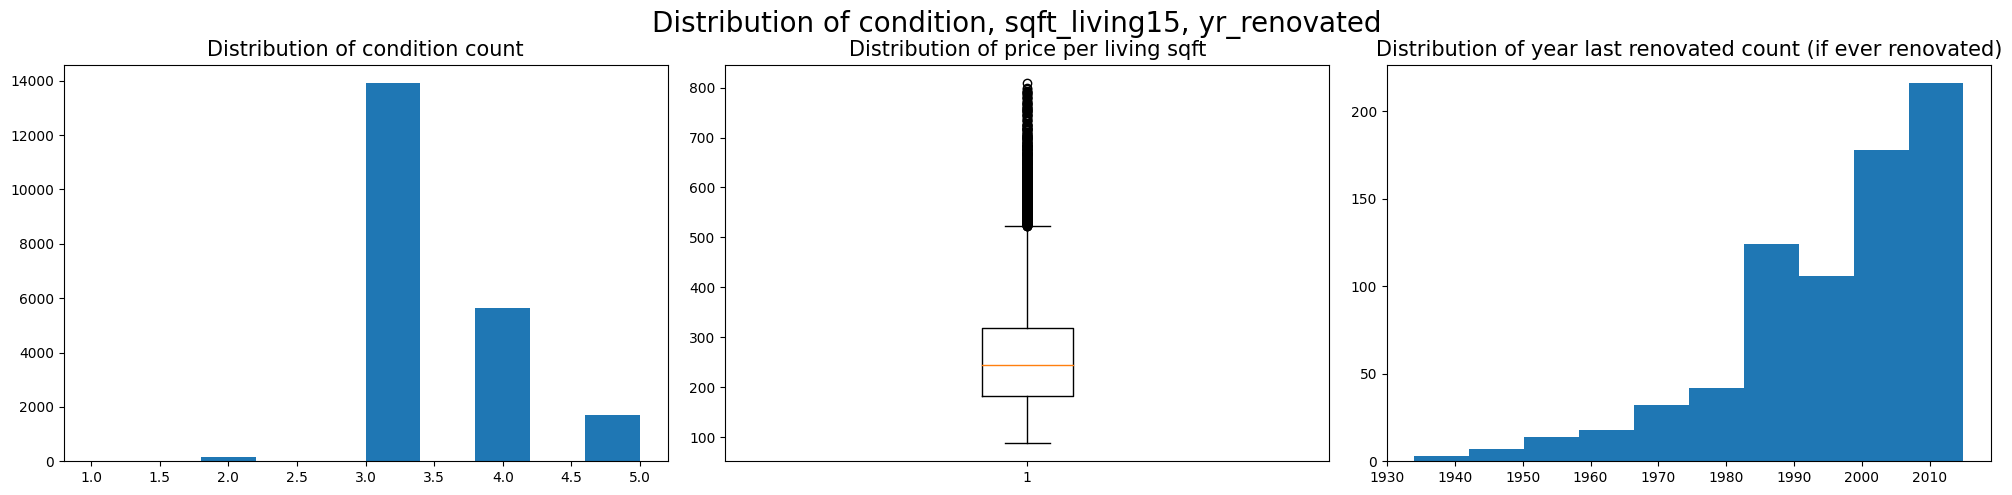

In [41]:
# Distributions
fig, ax = plt.subplots(1,3, figsize=(20,5)) # create subplots on 1 row and 3 columns
plt.suptitle('Distribution of condition, sqft_living15, yr_renovated', fontsize=20)
fig.tight_layout()

ax[0].hist(kch_robinson['condition']) # boxplot for condition
ax[0].set_title("Distribution of condition count", fontsize = 15); # sets title for subplot

ax[1].boxplot(x = kch_robinson['price_sqft_living'])
ax[1].set_title("Distribution of price per living sqft", fontsize = 15);

ax[2].hist(x = kch_robinson.query('yr_renovated!=0').yr_renovated)
ax[2].set_title("Distribution of year last renovated count (if ever renovated)", fontsize = 15);

**Take aways so far**

* Mostly medium condition, so not too shabby. Socially responsible renovation for properties of conditions 2 or 3. everything above unnecessary posh
* costs per sqft has a lot of outliers to the top. maybe too expensive - drop those? look closer (total price, need of renovation?)
* most properties never renovated - maybe not that old - or in high need of renovation.
    * most renovations after 1980

### 3. Data Cleaning 2. iteration

#### 3.1 Extract only poor neighborhoods
A *poor neighborhood* is understood as a zipcode area where 80% of the selling prices per sqft fall into the second quartile.

In [42]:
# find median of price_sqft
kch_robinson['price_sqft_living'].median()


245.23809523809524

In [43]:
# make df with only price per sqft of living area and the according zipcode
price_in_Q2 = kch_robinson.loc[:,['price_sqft_living', 'zipcode']]

# add column with frequency of each zipcode
price_in_Q2['freq_zipcode'] = price_in_Q2.groupby('zipcode')['zipcode'].transform('count')

# check
price_in_Q2.head(2)

,price_sqft_living,zipcode,freq_zipcode
0,188.050847,98178,258
1,209.338521,98125,402


In [44]:
# make data frame with only zipcodes where price per sqft of living area fall in second quartile
freq_Q2_zip = pd.DataFrame(price_in_Q2.query('price_sqft_living<=price_sqft_living.median()')['zipcode'])

# count frequency of each zipcode and add that information as a column
freq_Q2_zip['freq_price_q2'] = price_in_Q2.query('price_sqft_living<=price_sqft_living.median()').groupby('zipcode')['zipcode'].transform('count')

# check
freq_Q2_zip.head(2)

,zipcode,freq_price_q2
0,98178,220
1,98125,148


In [45]:
# do boith data frames have the same amount of zipcodes?
freq_Q2_zip.zipcode.nunique(), price_in_Q2.zipcode.nunique()

(69, 70)

One zipcode not in `freq_Q2_zip`. Find out which one and why (correct or mistake?):

In [46]:
from numpy import setdiff1d

freq_Q2_zip.zipcode.sort_values().unique(), price_in_Q2.zipcode.sort_values().unique()
set1 = price_in_Q2.zipcode.sort_values().unique()
set2 = freq_Q2_zip.zipcode.sort_values().unique()
zip_diff = setdiff1d(set1,set2)[0]
zip_diff
# zip 98039 not in freq_Q2_zip

98039

In [47]:
price_in_Q2.query('zipcode==@zip_diff').price_sqft_living.min()
# no property with price up to median; all are more expensive. very exclusive neighborhood --> 0% Q2

378.46153846153845

In [48]:
# only keep unique zips with respective frequency
price_in_Q2 = price_in_Q2.sort_values(by='zipcode')
price_in_Q2.drop_duplicates(subset='zipcode', inplace=True)
price_in_Q2

,price_sqft_living,zipcode,freq_zipcode
19679,142.857143,98001,358
16457,160.377358,98002,197
7786,142.629482,98003,276
11047,561.797753,98004,315
12236,323.232323,98005,168
...,...,...,...
4533,278.969957,98177,254
4741,183.854167,98178,258
12191,159.523810,98188,135
2104,200.000000,98198,275


In [49]:
# only keep unique zips with respective frequency
freq_Q2_zip = freq_Q2_zip.sort_values(by='zipcode')
freq_Q2_zip.drop_duplicates(subset='zipcode', inplace=True)
freq_Q2_zip

,zipcode,freq_price_q2
5152,98001,354
18900,98002,196
9439,98003,273
13344,98004,1
9252,98005,23
...,...,...
16864,98177,88
3948,98178,220
8608,98188,128
15496,98198,248


In [50]:
# which row is zipcode 98039 in in price_in_Q2? Drop that
price_in_Q2.drop(axis=0, index=price_in_Q2.query('zipcode==@zip_diff').index, inplace=True)
len(price_in_Q2)

69

In [51]:
# check
price_in_Q2.zipcode.unique() in freq_Q2_zip.zipcode.unique()

True

In [52]:
price_in_Q2.reset_index(inplace=True)
price_in_Q2.drop(axis=1, labels='index', inplace=True)
freq_Q2_zip.reset_index(inplace=True)
freq_Q2_zip.drop(axis=1, labels='index', inplace=True)

In [53]:
price_in_Q2.head()

,price_sqft_living,zipcode,freq_zipcode
0,142.857143,98001,358
1,160.377358,98002,197
2,142.629482,98003,276
3,561.797753,98004,315
4,323.232323,98005,168


In [54]:
freq_Q2_zip.head()

,zipcode,freq_price_q2
0,98001,354
1,98002,196
2,98003,273
3,98004,1
4,98005,23


In [55]:
# add column with percentage of properties in zipcode that have a price per sqft of living up to median price
freq_Q2_zip['share_q2'] = (freq_Q2_zip['freq_price_q2'] / price_in_Q2['freq_zipcode']) * 100
freq_Q2_zip.head()

,zipcode,freq_price_q2,share_q2
0,98001,354,98.882682
1,98002,196,99.492386
2,98003,273,98.913043
3,98004,1,0.317460
4,98005,23,13.690476


Make pd.Series with only zipcodes that meet share >= 80 %

In [56]:
share_80 = pd.Series(freq_Q2_zip.query('share_q2 >= 80')['zipcode'])
share_80.nunique()

22

In [57]:
# only keep those properties that are in zipcode areas where at least 80% have a price per sqft living up to median price
kch_robinson = kch_robinson.query('zipcode in @share_80')
kch_robinson.reset_index(inplace=True)
kch_robinson.drop(labels='index', axis=1, inplace=True)
kch_robinson.head()

,id,date,price,condition,yr_built,yr_renovated,zipcode,lat,long,dist_to_seattle,price_sqft_living,multi_sold,date_sold_old,price_sold_old
0,7129300520,2014-10-13,221900.0,3,1955,0,98178,47.5112,-122.257,11.979331,188.050847,False,NaT,NaN
1,1321400060,2014-06-27,257500.0,3,1995,0,98003,47.3097,-122.327,32.968130,150.145773,False,NaT,NaN
2,2008000270,2015-01-15,291850.0,3,1963,0,98198,47.4095,-122.315,21.908135,275.330189,False,NaT,NaN
3,3793500160,2015-03-12,323000.0,3,2003,0,98038,47.3684,-122.031,34.840445,170.899471,False,NaT,NaN
4,1875500060,2014-07-31,395000.0,3,1994,0,98019,47.7277,-121.962,30.902357,208.994709,False,NaT,NaN


In [58]:
share_80.unique()

array([98001, 98002, 98003, 98010, 98019, 98022, 98023, 98030, 98031,
       98032, 98038, 98042, 98055, 98058, 98059, 98065, 98092, 98148,
       98168, 98178, 98188, 98198])

#### 3.2 Add column with time since last renovation

In [59]:
# add column with years between building and renovating. if never renovated calculate age of house (i.e. (year 2015 - year property was built))
yrs_since_renovation = pd.Series(abs(2023 - kch_robinson.yr_renovated))
yrs_since_renovation.name = 'yrs_since_renovation'
yrs_since_renovation = pd.DataFrame(yrs_since_renovation)
yrs_since_renovation['yr_renovated'] = kch_robinson.yr_renovated.values

yrs_since_renovation.loc[yrs_since_renovation.query('yr_renovated==0').index,['yrs_since_renovation']] = 0

In [60]:
kch_robinson['yrs_since_renovation'] = yrs_since_renovation['yrs_since_renovation'].values
kch_robinson.head(2)

,id,date,price,condition,yr_built,yr_renovated,zipcode,lat,long,dist_to_seattle,price_sqft_living,multi_sold,date_sold_old,price_sold_old,yrs_since_renovation
0,7129300520,2014-10-13,221900.0,3,1955,0,98178,47.5112,-122.257,11.979331,188.050847,False,NaT,NaN,0
1,1321400060,2014-06-27,257500.0,3,1995,0,98003,47.3097,-122.327,32.968130,150.145773,False,NaT,NaN,0


### 4. Exploration 2. iteration

Check for distributions again with cleaned data set, only poor neighborhoods

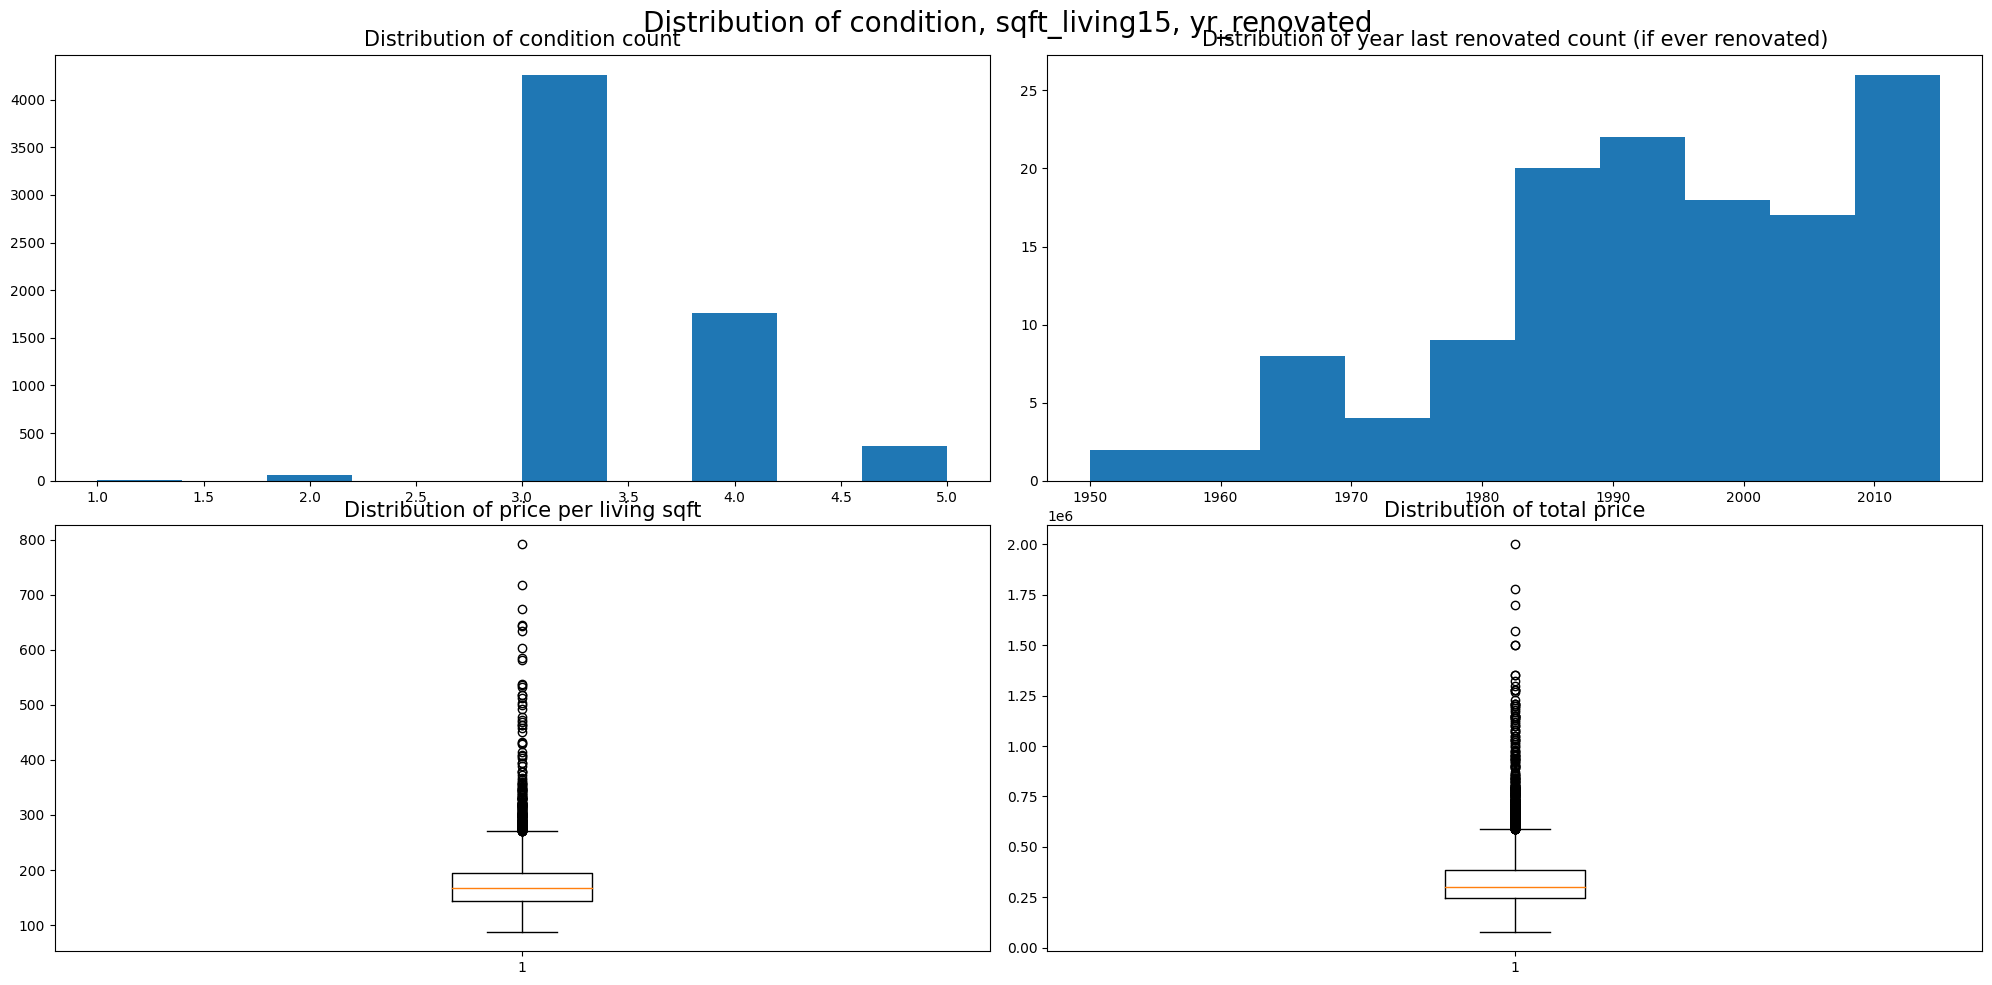

In [61]:
# Distributions
fig, ax = plt.subplots(2,2, figsize=(20,10)) # create subplots on 1 row and 3 columns
plt.suptitle('Distribution of condition, sqft_living15, yr_renovated', fontsize=20)
fig.tight_layout()

ax[0][0].hist(kch_robinson['condition']) # boxplot for condition
ax[0][0].set_title("Distribution of condition count", fontsize = 15); # sets title for subplot

ax[0][1].hist(x = kch_robinson.query('yr_renovated!=0').yr_renovated)
ax[0][1].set_title("Distribution of year last renovated count (if ever renovated)", fontsize = 15);

ax[1][0].boxplot(x = kch_robinson['price_sqft_living'])
ax[1][0].set_title("Distribution of price per living sqft", fontsize = 15);

ax[1][1].boxplot(x = kch_robinson['price'])
ax[1][1].set_title("Distribution of total price", fontsize = 15);

* Far less 4 and 5 conditioned properties (as expected)
* less outliers price wise (as expected)
* renovations on the whole not so long ago as with all properties seen

## Save cleaned data set for EDA

In [62]:
kch_robinson.head(2)

,id,date,price,condition,yr_built,yr_renovated,zipcode,lat,long,dist_to_seattle,price_sqft_living,multi_sold,date_sold_old,price_sold_old,yrs_since_renovation
0,7129300520,2014-10-13,221900.0,3,1955,0,98178,47.5112,-122.257,11.979331,188.050847,False,NaT,NaN,0
1,1321400060,2014-06-27,257500.0,3,1995,0,98003,47.3097,-122.327,32.968130,150.145773,False,NaT,NaN,0


In [63]:
kch_robinson.to_csv('data/kch_poor_neighborhood_clean_data.csv')
kch_df.to_csv('data/kch_clean_data.csv')

### Heatmap on Map

In [64]:
# make heatmap with price landscape. code inspo from Qingkai (https://qingkaikong.blogspot.com/2016/06/using-folium-3-heatmap.html?m=1). adjustments self-made

# Using USGS style tile
url_base = 'http://server.arcgisonline.com/ArcGIS/rest/services/'
service = 'World_Street_Map/MapServer/tile/{z}/{y}/{x}'
tileset = url_base + service

m = folium.Map(location=[47.60621, -122.33207], zoom_start=10,\
                control_scale = True, tiles=tileset, attr='USGS style')

m.add_child(plugins.HeatMap(zip(kch_robinson['lat'], kch_robinson['long'], kch_robinson['price']), radius = 12))

## 5. Relationships

In [65]:
#renovated = kch_robinson.query('yr_renovated!=0')
#renovated.head(2)

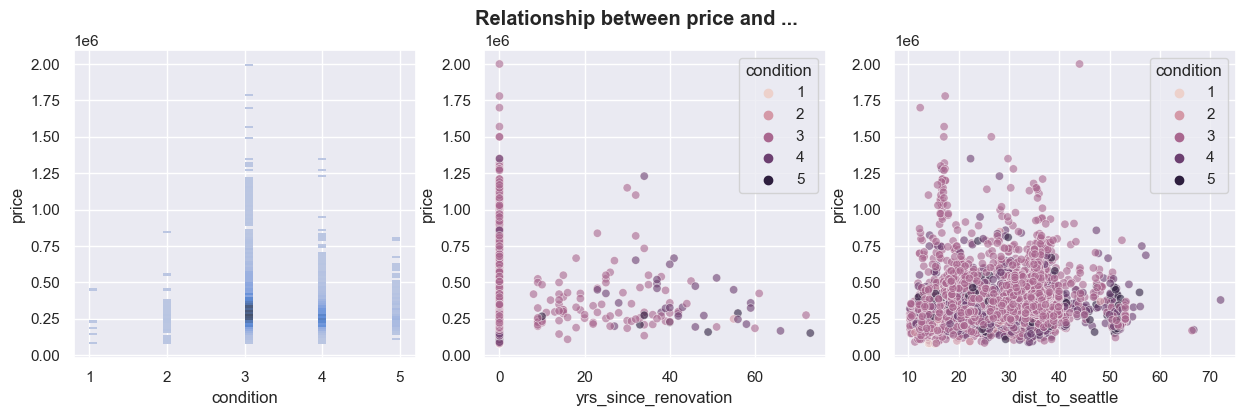

In [66]:
# --- SETTING THEME AND PLOT APPEARANCE ---
sns.set()
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1,3, figsize=(15,4)) # create subplots on 1 row and 3 columns                               
plt.suptitle('Relationship between price and ...', weight='bold')

# --- omit y-axis label for last two
ax[1].set_ylabel('')
ax[2].set_ylabel('')

# --- DEFINE PLOTS ---
sns.histplot(data=kch_robinson, x='condition', y='price', ax=ax[0]);
sns.scatterplot(data=kch_robinson, x='yrs_since_renovation', y='price', hue='condition', alpha=.6 , ax=ax[1]);
sns.scatterplot(data=kch_robinson, x='dist_to_seattle', y='price', hue='condition', alpha=.6, ax=ax[2]);



OPEN QUESTIONS- IS RENOVATION SUCH A HUGE FACTOR FOR PRICE?

## !! Have to handle the multi-sold properties !!

In [67]:
kch_robinson.query('multi_sold==True').price.min(), kch_robinson.query('multi_sold==True').price.max()

(157000.0, 700000.0)

In [68]:
kch_robinson.query('multi_sold!=True').price.min(), kch_robinson.query('multi_sold!=True').price.max()

(78000.0, 2000000.0)

## 6. Hypothesis testing

In [69]:
# add column with years between last renovation and now (2023). if never renovated calculate age of house (i.e. (year 2015 - year property was built))
yrs_since_renovation = pd.Series(abs(2023 - kch_df.yr_renovated))
yrs_since_renovation.name = 'yrs_since_renovation'
yrs_since_renovation = yrs_since_renovation.apply(lambda x: x*0 if x>115 else x*1)
kch_df['yrs_since_renovation'] = yrs_since_renovation.values
kch_df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,month,year,dist_to_seattle,price_sqft_living,multi_sold,date_sold_old,price_sold_old,yrs_since_renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1340,5650,10,2014,11.979331,188.050847,False,NaT,NaN,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1690,7639,12,2014,12.800484,209.338521,False,NaT,NaN,32


In [70]:
kch_df[["price", "dist_to_seattle"]].corr()

,price,dist_to_seattle
price,1.000000,-0.287316
dist_to_seattle,-0.287316,1.000000


In [71]:
kch_df.query('yrs_since_renovation!=0')[["price", "yrs_since_renovation"]].corr()

,price,yrs_since_renovation
price,1.000000,-0.122117
yrs_since_renovation,-0.122117,1.000000


In [72]:
corr_cond = kch_df[["price", "condition"]].corr(method='spearman')
corr_cond

,price,condition
price,1.000,0.016
condition,0.016,1.000


**1. The higher the current condition (i.e. better), the higher the price**
* rho = .018 &rarr; near to no correlation

**2. The farther away from the city center, the lower the price**
* r = -.29 &rarr; moderate correlation

**3.The more square feet the living area of the nearest neighbor has, the higher the price**
* r = .59 &rarr; strong correlation

In [73]:
# again look into descriptive statistics for my cleaned up data and get info
kch_robinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    6444 non-null   int64         
 1   date                  6444 non-null   datetime64[ns]
 2   price                 6444 non-null   float64       
 3   condition             6444 non-null   int32         
 4   yr_built              6444 non-null   int64         
 5   yr_renovated          6444 non-null   int64         
 6   zipcode               6444 non-null   int64         
 7   lat                   6444 non-null   float64       
 8   long                  6444 non-null   float64       
 9   dist_to_seattle       6444 non-null   float64       
 10  price_sqft_living     6444 non-null   float64       
 11  multi_sold            6444 non-null   bool          
 12  date_sold_old         61 non-null     datetime64[ns]
 13  price_sold_old    

In [74]:
kch_robinson.describe()

,id,date,price,condition,yr_built,yr_renovated,zipcode,lat,long,dist_to_seattle,price_sqft_living,date_sold_old,price_sold_old,yrs_since_renovation
count,6.444000e+03,6444,6.444000e+03,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,61,61.000000,6444.000000
mean,4.565434e+09,2014-11-04 20:48:29.497206528,3.373932e+05,3.374146,1979.840782,39.595127,98059.924426,47.398242,-122.170364,28.780724,173.526051,2014-09-10 02:45:14.754098432,206380.590164,0.588610
min,1.000102e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.401000,10.285662,87.588235,2014-05-05 00:00:00,85000.000000,0.000000
25%,2.023049e+09,2014-07-28 00:00:00,2.460000e+05,3.000000,1964.000000,0.000000,98023.000000,47.331100,-122.279000,22.081040,143.044642,2014-07-16 00:00:00,145000.000000,0.000000
50%,3.876520e+09,2014-10-27 00:00:00,3.000000e+05,3.000000,1983.000000,0.000000,98042.000000,47.378400,-122.182000,30.306145,166.666667,2014-09-16 00:00:00,175000.000000,0.000000
75%,7.502800e+09,2015-02-23 00:00:00,3.830000e+05,4.000000,1999.000000,0.000000,98065.000000,47.465825,-122.087000,34.652623,194.044428,2014-10-22 00:00:00,229950.000000,0.000000
max,9.835801e+09,2015-05-14 00:00:00,2.000000e+06,5.000000,2015.000000,2015.000000,98198.000000,47.773600,-121.473000,72.044568,791.666667,2015-02-27 00:00:00,740000.000000,73.000000
std,2.879464e+09,NaN,1.506444e+05,0.607641,23.091813,278.166282,56.165931,0.100037,0.131095,8.703509,49.366677,NaN,118669.785376,4.660346


## 7. Fine tuning and Explanation
* What do I want to use for my presentation? What is my intention of the depicted plots and tables?
* Clean up code, comment code
* add introduction
* add results